# Installing tools

In [ ]:
!pip install torch torchvision torchaudio
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt

# Importing repositories

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time
from playsound import playsound

# Collecting training images for 'awake'

In [ ]:
IMAGES_PATH = os.path.join('data2', 'images')
labels = ['awake']
number_imgs = 10
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        cv2.imwrite(imgname, frame)
        
        cv2.imshow('Image Collection', frame)
        
        time.sleep(1.5)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

# Collecting training images for 'drowsy'

In [ ]:
IMAGES_PATH = os.path.join('data2', 'images')
labels = ['drowsy']
number_imgs = 10
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(1.5)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

# Installing LabelImg tool  

In [ ]:
!git clone https://github.com/tzutalin/labelImg
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# Training the custom model 

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 250 --data dataset2.yml --weights yolov5s.pt --workers 2

# Loading the model

In [2]:
model = torch.hub.load('ultralytics/yolov5','custom',path='last6.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\JISHNU/.cache\torch\hub\master.zip
YOLOv5  2022-7-29 Python-3.10.5 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


# Test the model on a still image 

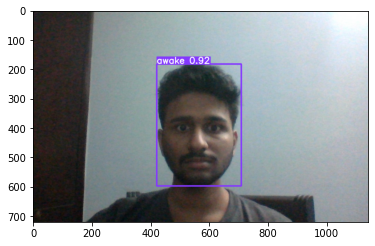

image 1/1: 720x1141 1 awake
Speed: 16.8ms pre-process, 292.4ms inference, 3.0ms NMS per image at shape (1, 3, 416, 640)


---------------------------------------------------------------



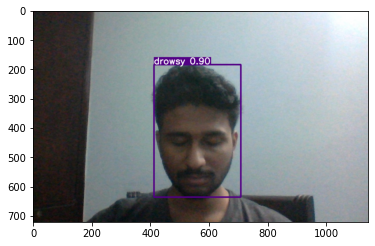

image 1/1: 720x1142 1 drowsy
Speed: 11.2ms pre-process, 212.0ms inference, 1.0ms NMS per image at shape (1, 3, 416, 640)


In [3]:
%matplotlib inline 

img1 = os.path.join('data2', 'images', 'WIN_20220716_23_13_21_Pro2.jpg')
results = model(img1)
plt.imshow(np.squeeze(results.render()))
plt.show()
results.print()

print("\n\n---------------------------------------------------------------\n")

img2 = os.path.join('data2', 'images', 'WIN_20220716_23_13_28_Pro2.jpg')
results2 = model(img2)
plt.imshow(np.squeeze(results2.render()))
plt.show()
results2.print()

# Use the model on a live video capture window

In [ ]:
f=0
cap = cv2.VideoCapture(0)
while cap.isOpened():
    
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if 'drowsy' in results.pandas().xyxy[0]['name'].tolist() :
        f=f+1
    else :
        f=0
        
    if f>=4 :
        playsound('alarm2.wav')
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()